In [ ]:
# San Francisco Rental Prices Dashboard
# Frank XU

In [18]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [19]:
# Read the Mapbox API key
load_dotenv()
mapbox_token=os.getenv("MAPBOX_API_KEY")
mapbox_token="pk.eyJ1IjoiZnJhbmt4dTE0IiwiYSI6ImNrZ2xkMjA4ZjAyZmIyeGxmZHhmNnkzOTIifQ.Yms3SjtbYK_V_RAhw6HtIg"
px.set_mapbox_access_token(mapbox_token)

In [20]:
# Import Data

In [21]:
# Import the CSVs to Pandas DataFrames
file_path=Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data=pd.read_csv(file_path, index_col="year")

In [22]:
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [23]:
file_path=Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations=pd.read_csv(file_path)

In [24]:
# PANEL VISUALIZATIONS

In [25]:
# Define Panel Visualization Functions
def housing_units_per_year():
    df_avg_housings=sfo_data["housing_units"].groupby(sfo_data.index).mean()
    sfo_plot=df_avg_housings.plot.bar()
    sfo_plot.set_xlabel("Year")
    sfo_plot.set_ylabel("Housing Units")
    sfo_plot.set_title("Housing Units in San Francisco 2010-2016", fontweight="bold", fontsize=12)
    min_unit=min(df_avg_housings)
    max_unit=max(df_avg_housings)
    std_unit=df_avg_housings.std()
    sfo_plot.set_ylim(min_unit-std_unit, max_unit+std_unit)
    
    return sfo_plot

In [26]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    sfo_housing_avg=sfo_data.groupby('year').mean()
    sfo_housing_avg[["sale_price_sqr_foot", "gross_rent"]]
    sfo_housing_avg=sfo_data.groupby('year').mean()
    sfo_housing_avg[["sale_price_sqr_foot", "gross_rent"]]
    plot_housing_avg=sfo_housing_avg["gross_rent"].hvplot(figsize=(10,10), title="Average Gross Rent In San Francisco")

    return plot_housing_avg

In [27]:
def average_sales_price():
    """Average Sales Price Per Year."""
    sfo_housing_avg=sfo_data.groupby('year').mean()
    sfo_housing_avg[["sale_price_sqr_foot", "gross_rent"]]
    plot_avg_sale_price=sfo_housing_avg["sale_price_sqr_foot"].hvplot(figsize=(10,10), title="Average Sale Price per Square Foot In San Francisco")

    return plot_avg_sale_price

In [28]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    df_cost=sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    df_cost.reset_index(inplace=True)
    df_cost=sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    df_cost.reset_index(inplace=True)
    df_cost_plot=df_cost.hvplot(x="year", y="sale_price_sqr_foot", groupby="neighborhood", kind="line")

        
    return df_cost_plot

In [29]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    top10=sfo_data.groupby('neighborhood').mean()
    top10=top10.sort_values(by="sale_price_sqr_foot", ascending=False)
    top10=top10[:9]
    top10.reset_index(inplace=True)

    plot_top10=top10["sale_price_sqr_foot"].hvplot.bar(
        title="Top 10 Neighborhood In San Francisco", 
        xlabel="SFO Neighborhood",
        ylabel="Sale Price Per Sq Foot")
   
    return plot_top10

In [30]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    par_1=px.parallel_coordinates(top10, color='sale_price_sqr_foot')
    
    return par_1

def parallel_categories():
    """Parallel Categories Plot."""
    
    par_2=px.parallel_categories(
    top10,
    dimensions=["neighborhood", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "SFO Neighborhood",
        "housing_units": "Number of Housing Units",
        "gross_rent": "Gross Rent",})

    return par_2

def neighborhood_map():
    """Neighborhood Map"""
    file_path = Path("Data/neighborhoods_coordinates.csv")
    df_neighborhood_locations = pd.read_csv(file_path)
    df_neighborhood_locations.head()
    
    df_neighborhood_values=sfo_data.groupby('neighborhood').mean()
    df_neighborhood_values.reset_index(inplace=True)
    df_neighborhood_values.head()
    sfo_neighborhood_values=pd.concat([df_neighborhood_locations, df_neighborhood_values], axis="columns", join="inner")
    sfo_neighborhood_values.head()

    map=px.scatter_mapbox(
    sfo_neighborhood_values,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="neighborhood",
    zoom=4)

    return map

In [31]:
# Panel Dashboard

NameError: name 'top10' is not defined

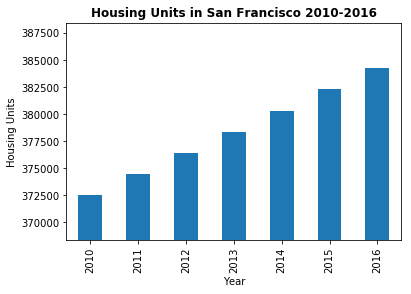

In [15]:
sfo_housing_mkt=pn.Column("San Francisco Housing Market",
                          housing_units_per_year(),
                          average_gross_rent(),
                          average_sales_price())

sfo_neighborhood_price=pn.Column("San Francisco Average & Top Neighborhoods",
                                average_price_by_neighborhood(), top_most_expensive_neighborhoods())

sfo_neighborhood_map=pn.Column("San Francisco Neighborhood Map", 
                               parallel_coordinates(), parallel_categories(), neighborhood_map())

sfo_dashboard=pn.Tabs(
    ("San Francisco Housing Market", sfo_housing_mkt),
    ("San Francisco Average and Top Neighborhood", sfo_neighborhood_price),
    ("SFO Neighborhood Maps", sfo_neighborhood_map))

sfo_dashboard

In [16]:
# Serve the Panel Dashboard

In [17]:
sfo_dashboard.servable()

NameError: name 'sfo_dashboard' is not defined